In [1]:
import urllib.request                                                                                
import bs4
import json
import pickle
#import sys

# 検索対象url番号
start, end = 0, 100 # int(sys.argv[1]), int(sys.argv[2])

# 取得する数
nb_menu = 1000000

# 取得した数
num = 0

# 検索を再開するurl番号
tmp = start

menu_keys = ['@context', '@type', 'name',
             'author', 'image', 'datePublished',
             'description', 'recipeYield', 'recipeIngredient',
             'recipeInstructions', 'cookTime']

#menu_template = dict([(key, 'None') for key in menu_keys]) # 複製には deepcopy を使う

menu = []

while(num < nb_menu and tmp < end): # nb_menu個見つけるか、startがendになるまで # 冗長...

    for i in range(tmp, end):
        tmp = i+1 # 次に検索し始めるurl番号を記録
        url = 'https://cookpad.com/recipe/' + str(i)
        try:
            _menu = bs4.BeautifulSoup(urllib.request.urlopen(url).read(), "lxml")
            print("found:", str(start) + '-' + str(end), num, url)
            _menu = json.loads(_menu.find("script", {"type": "application/ld+json"}).get_text())
            menu.append(_menu)
            num += 1
            break
        except urllib.error.HTTPError as e:
            continue


with open('data_sample/menu-' + str(start) + '-' + str(end) + '.pkl', 'wb') as f:
    pickle.dump(menu, f)


found: 0-100 0 https://cookpad.com/recipe/43
found: 0-100 1 https://cookpad.com/recipe/54
found: 0-100 2 https://cookpad.com/recipe/56
found: 0-100 3 https://cookpad.com/recipe/57
found: 0-100 4 https://cookpad.com/recipe/58
found: 0-100 5 https://cookpad.com/recipe/59
found: 0-100 6 https://cookpad.com/recipe/61
found: 0-100 7 https://cookpad.com/recipe/64
found: 0-100 8 https://cookpad.com/recipe/65
found: 0-100 9 https://cookpad.com/recipe/70
found: 0-100 10 https://cookpad.com/recipe/72
found: 0-100 11 https://cookpad.com/recipe/74
found: 0-100 12 https://cookpad.com/recipe/75
found: 0-100 13 https://cookpad.com/recipe/76
found: 0-100 14 https://cookpad.com/recipe/77
found: 0-100 15 https://cookpad.com/recipe/80
found: 0-100 16 https://cookpad.com/recipe/81
found: 0-100 17 https://cookpad.com/recipe/83
found: 0-100 18 https://cookpad.com/recipe/84
found: 0-100 19 https://cookpad.com/recipe/85
found: 0-100 20 https://cookpad.com/recipe/86
found: 0-100 21 https://cookpad.com/recipe/8

In [2]:
with open('data_sample/menu-0-100.pkl', 'rb') as f:
    hoge = pickle.load(f)

for i in range(3): #range(len(hoge)):
    print()
    print(i)
    print('name: ', hoge[i]['name'])
    print('datePublished: ', hoge[i]['datePublished'])
    print('image: ', hoge[i]['image'])
    print('recipeIngredient: ', hoge[i]['recipeIngredient']) # 半角空白文字で区切られてる
    print('recipeInstructions: ', hoge[i]['recipeInstructions']) # リストになってる
    #print(hoge[i]) # json形式



0
name:  フルーツ・ジャム
datePublished:  1998-04-21
image:  https://assets.cpcdn.com/assets/blank_logo_kondate_spweb.png?6f9d23b17b11c778db08604964160405d12a573e53eccf4bc888897a2d931956
recipeIngredient:  ['いちご 小さめのいちご2パック']
recipeInstructions:  ['いちごを塩ふってざっと洗う。水気を切ったらへたをとる。', '手鍋にいちごを入れて、砂糖大さじ4杯。水を100cc.\r\n火にかける。沸騰したらいったん火をとめて、冷めたらまた沸騰するまで煮る。これを3回.', '煮詰め方はお好みで。ほかにも、キウイ\r\n(砂糖多め)、干しあんず(湯でもどす)、干しあんず+パイン、なしなどでもいけます。']

1
name:  豚の角煮
datePublished:  1998-04-23
image:  https://img.cpcdn.com/recipes/54/464x260/96eb0869c8e1ee4e490a0c3081fae9c1.jpg?u=17&p=1214208216
recipeIngredient:  ['しょうが お好みで', 'ニンニク お好みで', 'ねぎ １本', '豚肉 バラのブロック２パック', '砂糖 小さじ１から２くらい', '酒 たくさん（安い日本酒でいい）', '醤油 適量（味見しながらね）', 'みりん 大さじ３くらい']
recipeInstructions:  ['鍋に、水とたっぷりのお酒、ねぎの使わない葉の部分、しょうがの皮、にんにくを入れて、２，３時間煮込みます。', 'その間、あくや浮いてきた脂を丁寧に取りましょう。煮込んだお肉を、いったん水で洗いましょう。', '鍋に、豚肉をいれて、酒、砂糖、みりん、醤油、しょうが（薄切り）、にんにくで煮込みます。', '落とし蓋をして１時間。食べるちょっと前にねぎを入れて、味がついたらたべましょう。写真のは、ちんげん菜を入れてみました。']

2
name:  わがやのおはぎ　part1
datePublished:  1998-04-24
image: 

url:  https://assets.cpcdn.com/assets/blank_logo_kondate_spweb.png?6f9d23b17b11c778db08604964160405d12a573e53eccf4bc888897a2d931956
[W] No Image

url:  https://img.cpcdn.com/recipes/54/464x260/96eb0869c8e1ee4e490a0c3081fae9c1.jpg?u=17&p=1214208216
found:  豚の角煮


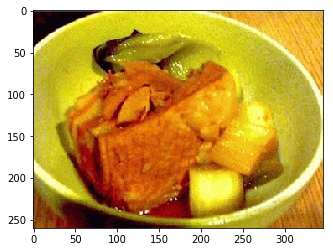

url:  https://img.cpcdn.com/recipes/56/464x260/cfa5f12dfba1ce96f5f48954fa660daa.jpg?u=13&p=1214208216
found:  わがやのおはぎ　part1


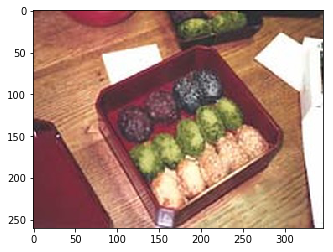

url:  https://assets.cpcdn.com/assets/blank_logo_kondate_spweb.png?6f9d23b17b11c778db08604964160405d12a573e53eccf4bc888897a2d931956
[W] No Image

url:  https://assets.cpcdn.com/assets/blank_logo_kondate_spweb.png?6f9d23b17b11c778db08604964160405d12a573e53eccf4bc888897a2d931956
[W] No Image

url:  https://img.cpcdn.com/recipes/59/464x260/2e78c18ad52f7e705fc9477dca94e0aa.jpg?u=20&p=1214208216
found:  エスプレッソプリン


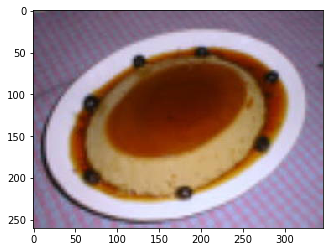

In [4]:
import pickle

import io
import urllib.request
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

# No Image のときの画像はいらない
url_blacklist = ['https://assets.cpcdn.com/assets/blank_logo_kondate_spweb.png?6f9d23b17b11c778db08604964160405d12a573e53eccf4bc888897a2d931956']

menu_num = 'data_sample/menu-0-100'
with open(menu_num + '.pkl', 'rb') as f:
    hoge = pickle.load(f)

for i in range(6):#range(len(hoge)):
    url = hoge[i]['image']
    print("url: ", url)
    if url in url_blacklist:
        print("[W] No Image\n")
    else:
        f = io.BytesIO(urllib.request.urlopen(url).read())
        img = Image.open(f)
        #img.save('data_image/' + menu_num + '-' + str(i) + '.png')
        img = np.asarray(img)
        
        print('found: ', hoge[i]['name'])
        plt.imshow(img)
        plt.show()
